In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)


[array([[  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ],
       [  10.6,    7. ],
       [   9.8,    6.7],
       [  35. ,  680. ],
       [  11.2,    9.8],
       [  31. ,  475. ],
       [  34.5,  620. ],
       [  33.5,  610. ],
       [  15. ,   19.9],
       [  34. ,  575. ],
       [  30. ,  390. ],
       [  11.8,    9.9],
       [  32. ,  600. ],
       [  36. ,  850. ],
       [  11. ,    9.7]]), array([[ 32. , 340. ],
       [ 12.4,  13.4],
       [ 14.3,  19.7],
       [ 12.2,  12.2],
     

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

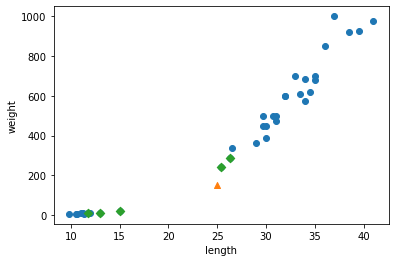

In [13]:
import matplotlib.pyplot as plt

d, i = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[i, 0], train_input[i, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std


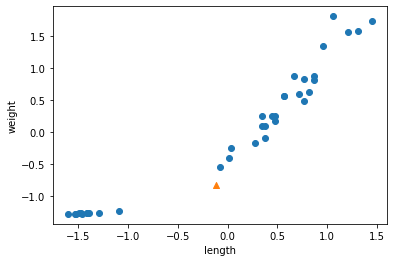

In [17]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

[1.]


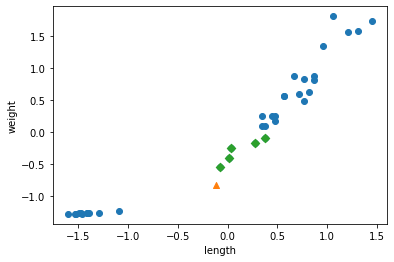

In [21]:
d, i = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[i, 0], train_scaled[i, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()